In [10]:
!pip install -U langchain-google-vertexai

  Using cached google_cloud_storage-2.19.0-py2.py3-none-any.whl.metadata (9.1 kB)
  Using cached google_api_core-2.24.1-py3-none-any.whl.metadata (3.0 kB)
  Using cached google_auth-2.38.0-py2.py3-none-any.whl.metadata (4.8 kB)
  Using cached proto_plus-1.26.0-py3-none-any.whl.metadata (2.2 kB)
  Using cached protobuf-5.29.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
  Using cached docstring_parser-0.16-py3-none-any.whl.metadata (3.0 kB)
  Using cached google_resumable_media-2.7.2-py2.py3-none-any.whl.metadata (2.2 kB)
  Using cached google_crc32c-1.6.0-cp311-cp311-macosx_12_0_arm64.whl.metadata (2.3 kB)
  Using cached grpcio-1.70.0-cp311-cp311-macosx_10_14_universal2.whl.metadata (3.9 kB)
  Using cached grpcio_status-1.70.0-py3-none-any.whl.metadata (1.1 kB)
  Using cached pyasn1_modules-0.4.1-py3-none-any.whl.metadata (3.5 kB)
  Using cached rsa-4.9-py3-none-any.whl.metadata (4.2 kB)
  Using cached grpc_google_iam_v1-0.14.0-py2.py3-none-any.whl.metadata (3.3 kB)
  Usin

In [1]:
! pip install -U -q open-deep-research


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [11]:
import open_deep_research   
print(open_deep_research.__version__) 

0.0.6


In [12]:
from IPython.display import Image, display
from langgraph.types import Command
from langgraph.checkpoint.memory import MemorySaver
from open_deep_research.graph import builder

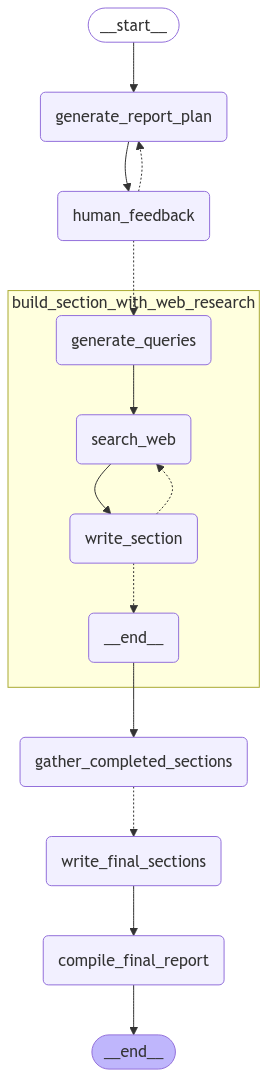

In [13]:
memory = MemorySaver()
graph = builder.compile(checkpointer=memory)
display(Image(graph.get_graph(xray=1).draw_mermaid_png()))

In [14]:
import os, getpass

def _set_env(var: str):
    if not os.environ.get(var):
        os.environ[var] = getpass.getpass(f"{var}: ")

# Set the API keys used for any selections below
_set_env("OPENAI_API_KEY")
_set_env("ANTHROPIC_API_KEY")
_set_env("TAVILY_API_KEY")
_set_env("GROQ_API_KEY")
_set_env("GOOGLE_API_KEY")
_set_env("PERPLEXITY_API_KEY")

In [21]:
import uuid 
from IPython.display import Markdown

REPORT_STRUCTURE = """Use this structure to create a report on the user-provided topic:

1. Introduction (no research needed)
   - Brief overview of the topic area

2. Main Body Sections:
   - Each section should focus on a sub-topic of the user-provided topic
   
3. Conclusion
   - Aim for 1 structural element (either a list of table) that distills the main body sections 
   - Provide a concise summary of the report
   
Importance:
   - only answer in Korean   
   """

# # DeepSeek-R1-Distill-Llama-70B for planning
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "groq",
#                            "planner_model": "deepseek-r1-distill-llama-70b",
#                            "writer_provider": "groq",
#                            "writer_model": "llama-3.3-70b-versatile",
#                            "report_structure": REPORT_STRUCTURE,
#                            "max_search_depth": 1,}
#                            }

# # Fast config (less search depth) with o3-mini for planning and Claude 3.5 Sonnet for writing
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "tavily",
#                            "planner_provider": "openai",
#                            "planner_model": "o3-mini",
#                            "writer_provider": "anthropic",
#                            "writer_model": "claude-3-5-sonnet-latest",
#                            "max_search_depth": 1,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# # Claude 3.7 Sonnet for planning with perplexity search
# thread = {"configurable": {"thread_id": str(uuid.uuid4()),
#                            "search_api": "perplexity",
#                            "planner_provider": "anthropic",
#                            "planner_model": "claude-3-7-sonnet-latest",
#                            "writer_provider": "anthropic",
#                            "writer_model": "claude-3-5-sonnet-latest",
#                            "max_search_depth": 2,
#                            "report_structure": REPORT_STRUCTURE,
#                            }}

# Google Gemini for planning with tavily search
thread = {"configurable": {"thread_id": str(uuid.uuid4()),
                           "search_api": "tavily",
                           "planner_provider": "google_vertexai",
                           "planner_model": "gemini-2.0-flash-001",
                           "writer_provider": "google_vertexai",
                           "writer_model": "gemini-2.0-flash-001",
                           "max_search_depth": 2,
                           "report_structure": REPORT_STRUCTURE,
                           }}

# Create a topic
topic = "2025년도 IT 시장에서 10개의 트렌트는 무엇인가? 한국어로 답변해주세요."

# Run the graph until the interruption
async for event in graph.astream({"topic":topic,}, thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring


Please provide feedback on the following report plan. 
                        

Section: 서론
Description: 2025년 IT 시장 트렌드에 대한 간략한 소개 및 중요성 강조
Research needed: No


Section: 인공지능(AI)의 발전과 활용
Description: 인공지능(AI)의 발전과 다양한 산업 분야에서의 활용 (AI 코딩 지원, AI 비서, 자동화 시스템, 의료 AI 등). 생성형 AI의 역할.
Research needed: Yes


Section: 클라우드 컴퓨팅
Description: 클라우드 컴퓨팅 기술의 발전과 Serverless Computing, AI Cloud, 엣지 AI 등의 주요 기술 동향
Research needed: Yes


Section: 사이버 보안
Description: 제로 트러스트 보안(Zero Trust Security)과 AI 자동 보안 대응 시스템의 중요성, AI 기반 탐지 시스템, 블록체인 보안, 보안 자동화 기술
Research needed: Yes


Section: 양자 컴퓨팅
Description: 양자 컴퓨팅 기술의 발전과 금융, 제약, AI 연구 등에서의 활용 전망
Research needed: Yes


Section: AI 로보틱스
Description: AI와 로보틱스 기술 결합으로 인한 스마트 팩토리, 자율주행, AI 로봇 시장 성장, AI 기반 자율주행 자동차, 로봇 물류 시스템, 스마트 헬스케어 로봇 발전
Research needed: Yes


Section: 블록체인
Description: 블록체인 기술의 금융, 비즈니스, 공급망 관리 등 다양한 분야에서의 역할 및 분산원장기술(DLT) 기반의 데이터 위변조 방지
Research needed: Yes


Section: ESG 경영
Description: ESG 경영의 중요성 확대 및 관련 기술 트렌드 (친환경 제품, 지속 가능 경영, ESG 공시 및 관리 자동화 등)
Research needed: Yes


Section: AR/VR
Description: AR/VR 기술의 산업 현장 및 교육 분야 활용 증가 (AR 조립 가이드 시스템, VR 실습 교육 등)
Research needed: Yes


Section: 5G/6G
Description: 5G/6G 네트워크의 발전과 초고속 연결 지원, 산업 전반에 미치는 영향
Research needed: Yes


Section: 결론
Description: 2025년 IT 시장 트렌드를 요약하고, 미래 전망 제시 (표 또는 리스트 활용)
Research needed: No



                        
Does the report plan meet your needs? Pass 'true' to approve the report plan or provide feedback to regenerate the report plan:

In [22]:
# Pass feedback to update the report plan  
async for event in graph.astream(Command(resume="조사는 한국 시장과 미국 시장을 구분해서 조사하시오."), thread, stream_mode="updates"):
    if '__interrupt__' in event:
        interrupt_value = event['__interrupt__'][0].value
        display(Markdown(interrupt_value))

Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring


Please provide feedback on the following report plan. 
                        

Section: 서론
Description: 2025년 IT 시장 트렌드의 중요성 및 보고서의 목표 간략히 소개
Research needed: No


Section: 인공지능(AI)
Description: 인공지능(AI) 기술의 발전과 한국 및 미국 시장에서의 영향 분석. AI 코파일럿, AI 보안 시스템, 생성형 AI 투자 증가 등을 포함.
Research needed: Yes


Section: 클라우드 컴퓨팅
Description: 클라우드 컴퓨팅의 발전과 클라우드 네이티브 기술의 중요성 분석. 데이터 암호화 및 개인 정보 보호 규제 강화에 대한 내용 포함. 한국 및 미국 시장에서의 클라우드 도입 현황 비교.
Research needed: Yes


Section: Web3
Description: Web3 기술(블록체인, 스마트 계약, DeFi, NFT)의 발전과 다양한 산업에서의 활용 사례 분석. 투명한 데이터 관리 및 보안 강화에 대한 내용 포함. 한국 및 미국 시장에서의 Web3 기술 동향 비교.
Research needed: Yes


Section: 확장현실(XR)
Description: 확장현실(XR) 기술(VR, AR)의 발전과 메타버스 플랫폼의 활성화 전망. 교육, 헬스케어, 원격 협업 분야에서의 XR 활용 증가 분석. 애플 비전 프로(Apple Vision Pro)와 같은 차세대 XR 기기 영향 분석. 한국 및 미국 시장에서의 XR 기술 개발 동향 비교.
Research needed: Yes


Section: 사이버 보안
Description: 사이버 보안 위협의 증가와 제로 트러스트 아키텍처(ZTA)의 중요성 강조. AI 보안 시스템 및 블록체인 보안 기술 발전 분석. 한국 및 미국 기업의 사이버 보안 투자 동향 비교.
Research needed: Yes


Section: IoT 및 엣지 컴퓨팅
Description: IoT(사물 인터넷)와 엣지 컴퓨팅 기술의 발전과 실시간 데이터 처리 혁신 분석. 스마트 디바이스와의 상호 작용 및 다양한 산업에서의 활용 사례 포함. 한국 및 미국 시장에서의 IoT 및 엣지 컴퓨팅 적용 사례 비교.
Research needed: Yes


Section: 양자 컴퓨팅
Description: 양자 컴퓨팅 기술의 발전과 글로벌 시장에 미치는 영향 분석. 신약 개발 및 금융 모델링을 위한 컴퓨팅 성능 향상에 대한 내용 포함. 한국 및 미국 시장에서의 양자 컴퓨팅 기술 투자 현황 비교.
Research needed: Yes


Section: 자동화
Description: 자동화 기술의 발전과 채용 프로세스, 마케팅, 품질 모니터링 등 다양한 업무 자동화 사례 분석. AI 기반 자동화 시스템의 효율성 및 개선 방안 제시. 한국 및 미국 시장에서의 업무 자동화 도입 현황 비교.
Research needed: Yes


Section: 데이터 레이크 및 데이터 메시
Description: 데이터 레이크와 데이터 메시 아키텍처의 발전과 빅데이터 처리 방식 변화 분석. AI 및 데이터 플랫폼의 중요성 부각. 한국 및 미국 시장에서의 데이터 관리 및 활용 전략 비교.
Research needed: Yes


Section: 감성 AI
Description: 감성 AI 기술의 발전과 의료, UX 등 다양한 분야에서의 활용 사례 분석. 환자 데이터 수집 및 의료 종사자 업무량 감소 효과 분석. 한국 및 미국 시장에서의 감성 AI 기술 개발 동향 비교.
Research needed: Yes


Section: 결론
Description: 2025년 IT 시장 10대 트렌드 요약 및 결론.
Research needed: No



                        
Does the report plan meet your needs? Pass 'true' to approve the report plan or provide feedback to regenerate the report plan:

In [23]:
# Pass True to approve the report plan 
async for event in graph.astream(Command(resume=True), thread, stream_mode="updates"):
    print(event)
    print("\n")

Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring


Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring


{'human_feedback': None}




Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring
Key '$defs' is not supported in schema, ignoring


I0000 00:00:1740726943.476617 44342228 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
I0000 00:00:1740726943.541967 44342226 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
I0000 00:00:1740726943.669394 44342224 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


I0000 00:00:1740726944.000099 44342218 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


I0000 00:00:1740726944.534790 44320430 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


I0000 00:00:1740726947.471655 44344150 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726947.698703 44321101 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726948.449002 44315203 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726948.690441 44315189 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


{'build_section_with_web_research': {'completed_sections': [Section(name='확장현실(XR)', description='확장현실(XR) 기술(VR, AR)의 발전과 메타버스 플랫폼의 활성화 전망. 교육, 헬스케어, 원격 협업 분야에서의 XR 활용 증가 분석. 애플 비전 프로(Apple Vision Pro)와 같은 차세대 XR 기기 영향 분석. 한국 및 미국 시장에서의 XR 기술 개발 동향 비교.', research=True, content="## 확장현실(XR)\n\n**확장현실(XR)은 가상현실(VR), 증강현실(AR), 혼합현실(MR)을 포괄하는 기술로, 2025년 IT 시장에서 중요한 트렌드로 부상할 전망이다.** XR 기술은 교육, 헬스케어, 원격 협업 등 다양한 분야에서 활용이 증가할 것으로 예상된다. 특히, 한국가스공사는 설비 정기점검에 XR 기반 원격 협업 시스템을 도입하여 유지보수 효율성을 높이고 있다.\n\n애플의 비전 프로(Vision Pro) 출시를 기점으로 XR 시장은 새로운 전환점을 맞이할 것으로 보인다. 삼성전자 역시 구글, 퀄컴과의 협력을 통해 XR 기기 개발에 박차를 가하고 있다. 디스플레이 업계에서는 XR 기기용 올레도스(OLEDoS) 개발 경쟁이 심화될 것으로 예상된다.\n\n한국디스플레이산업협회는 XR 시장 중심의 차세대 기술 연구·개발(R&D) 강화를 통해 시장 판도를 바꾼다는 전략을 수립했다. 2024년 XR 헤드셋 예상 출하량은 약 390만 대로 전망된다.\n\n### Sources\n* 버넥트 코스닥 상장! 확장현실 (Xr) 기술 현장 적용 사례와 주가 전망 : https://beodinews.com/2023/07/26/버넥트-코스닥-상장/\n* XR[eXtended Reality]의 의미와 적용사례 및 향후 전망 : https://blog.naver.com/PostView.naver?blogId=hanansk&logNo=223261729504\n* Xr 경험의 모

Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726950.803925 44342228 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726950.987904 44342226 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726951.328136 44321103 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726951.725972 44320430 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726952.068106 44342224 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
I0000 00:00:1740726954.303449 44320430 fork_posix.cc:75] Other threads are currently calling into gRPC, skippi

{'build_section_with_web_research': {'completed_sections': [Section(name='양자 컴퓨팅', description='양자 컴퓨팅 기술의 발전과 글로벌 시장에 미치는 영향 분석. 신약 개발 및 금융 모델링을 위한 컴퓨팅 성능 향상에 대한 내용 포함. 한국 및 미국 시장에서의 양자 컴퓨팅 기술 투자 현황 비교.', research=True, content='## 양자 컴퓨팅\n\n**양자 컴퓨팅은 특정 문제 해결에서 기존 컴퓨터의 능력을 능가하며, 신약 개발, 금융 모델링, AI 등 다양한 분야에서 혁신을 주도할 잠재력을 지닌다.** 큐비트의 중첩 및 얽힘 특성을 활용, 복잡한 계산을 병렬로 처리하여 기존 슈퍼컴퓨터로도 해결하기 어려운 문제 해결이 가능하다.\n\n글로벌 양자 컴퓨팅 시장은 미국과 중국이 주도하고 있다. 중국은 정부 주도로 막대한 투자를 통해 양자 기술 특허를 선점하고 있으며, 미국은 IBM, Google, Microsoft 등 민간 기업이 기술 개발을 주도한다. 한국은 양자 암호화 기술에 집중하며 민간 기업 중심으로 연구를 확대하고 있지만, 투자 규모는 상대적으로 초기 단계에 머무르고 있다.\n\n신약 개발 분야에서 양자 컴퓨팅은 분자 시뮬레이션을 가속화하여 신약 후보 물질 탐색 및 개발 기간을 단축할 수 있다. 금융 분야에서는 복잡한 금융 모델링 및 시장 예측 정확도를 향상시켜 리스크 관리 및 투자 전략 최적화에 기여할 수 있다.\n\n### Sources\n* 양자 컴퓨터의 금융 혁신: 금융 모델링과 시장 예측의 미래 : https://choimh13.tistory.com/entry/양자-컴퓨터\n* 양자 컴퓨터, 5가지 미래 혁명과 글로벌 경쟁 구도, 최신 분석! : https://jsheblog.com/양자-컴퓨터-5가지-미래-혁명과-글로벌-경쟁-구도-최신/\n* 양자컴퓨팅 기술: 2030년 시장 성장 가능성과 투자 기회 : https://omokan.tistory.com/entry/

Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726963.933867 44342226 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726964.223688 44315189 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
I0000 00:00:1740726964.332577 44321103 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


{'build_section_with_web_research': {'completed_sections': [Section(name='감성 AI', description='감성 AI 기술의 발전과 의료, UX 등 다양한 분야에서의 활용 사례 분석. 환자 데이터 수집 및 의료 종사자 업무량 감소 효과 분석. 한국 및 미국 시장에서의 감성 AI 기술 개발 동향 비교.', research=True, content='## 감성 AI\n\n**감성 AI는 인간의 감정을 인식하고 반응하는 기술로, 2025년에는 UX 향상 및 다양한 산업 분야에서 활용이 증가할 것으로 예상된다.** 특히 의료 분야에서 감성 AI는 환자의 감정 상태를 파악하여 맞춤형 치료 및 상담을 제공하는 데 활용될 수 있다. 예를 들어, AI 챗봇이 환자의 불안감을 감지하고 진정시키는 대화를 유도할 수 있다.\n\n감성 AI는 뇌파 기반 기술, 인간-컴퓨터 인터페이스(HCI) 등의 발전과 함께 더욱 정교해질 전망이다. 기업들은 감성 AI를 활용하여 고객 서비스, 마케팅, 제품 개발 등 다양한 분야에서 혁신을 추진할 수 있다.\n\n감성 AI 기술은 윤리적인 문제와 개인 정보 보호 문제를 야기할 수 있으므로, AI 윤리 규제 강화 및 안전한 사용 방안 마련이 필요하다.\n\n### Sources\n* 2025년 최신 IT 트렌드 요약: AI, 클라우드, Web3까지 한눈에 : https://tech-journey.tistory.com/entry/2025년-최신-IT-트렌드-요약-AI-클라우드-Web3까지-한눈에\n* 가트너 2025 전략 기술 트렌드, 2025년을 성공으로 이끌 10대 핵심 It 트렌드를 주목하세요! : https://www.skcc.co.kr/insight/trend/3006\n* 2025년 주목해야 할 IT 트렌드 10가지 - runimw.tistory.com : https://runimw.tistory.com/entry/2025년-주목해야-할-IT-트렌드-10가지\n* 2025년 주목

Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726968.337754 44342222 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers
Key '$defs' is not supported in schema, ignoring
I0000 00:00:1740726968.804412 44344150 fork_posix.cc:75] Other threads are currently calling into gRPC, skipping fork() handlers


{'build_section_with_web_research': {'completed_sections': [Section(name='Web3', description='Web3 기술(블록체인, 스마트 계약, DeFi, NFT)의 발전과 다양한 산업에서의 활용 사례 분석. 투명한 데이터 관리 및 보안 강화에 대한 내용 포함. 한국 및 미국 시장에서의 Web3 기술 동향 비교.', research=True, content="## Web3\n\n**Web3 기술은 2025년에도 지속적인 발전을 거듭하며 AI와의 융합, DeFi 혁신, 그리고 일상 생활 침투 확대를 통해 IT 시장의 주요 트렌드로 자리매김할 것이다.** 블록체인 기술은 금융 외에도 핵융합 연구, 헬스케어, 우주 탐사 등 다양한 분야에서 활용되며 데이터 보안, 협업 효율성, 투명성을 높이는 데 기여한다.\n\nAI 에이전트는 DeFi 프로토콜을 자동화하고, 데이터 분석을 통해 새로운 가치를 창출하며, 분산형 자율 챗봇(DAC) 형태로 커뮤니티 운영 및 콘텐츠 생성에 활용될 것이다. 미국은 암호화폐 규제 명확성 확보, 스타트업 생태계 활성화, 자본 접근성 우위를 바탕으로 Web3 혁신의 중심지로 부상할 전망이다.\n\nWeb3 기술의 대중화를 위해서는 사용 편의성 개선이 필수적이다. 복잡한 블록체인 용어 및 기술적 난이도를 낮추고, 실생활 문제를 해결하는 직관적인 사용자 경험을 제공하는 것이 중요하다.\n\n### Sources\n* 2025년 It 트렌드 Top 7 - 미래를 바꿀 혁신 기술 : https://yeon01.tistory.com/entry/2025년-IT-트렌드-TOP-7-–-미래를-바꿀-혁신-기술\n* 가트너 2025 전략 기술 트렌드, 2025년을 성공으로 이끌 10대 핵심 It 트렌드를 주목하세요! : https://www.skcc.co.kr/insight/trend/3006\n* 2025년에 주목해야 할 'It 트렌드'! - 네이버 블로그 : https://blog.naver.co

Key '$defs' is not supported in schema, ignoring


{'build_section_with_web_research': {'completed_sections': [Section(name='클라우드 컴퓨팅', description='클라우드 컴퓨팅의 발전과 클라우드 네이티브 기술의 중요성 분석. 데이터 암호화 및 개인 정보 보호 규제 강화에 대한 내용 포함. 한국 및 미국 시장에서의 클라우드 도입 현황 비교.', research=True, content='## 클라우드 컴퓨팅\n\n**한국 클라우드 컴퓨팅 시장은 2025년에 68억 3천만 달러 규모로 성장할 것으로 예상되며, 2030년까지 연평균 23.82% 성장률을 기록하며 198억 9천만 달러에 이를 전망이다.** 이는 디지털 전환 가속화와 함께 AI 도입 수요 증가에 따른 결과이다. 한국 IDC는 2027년까지 기업의 40% 이상이 클라우드 아키텍처를 현대화할 것으로 예측했다.\n\n클라우드 도입을 촉진하기 위한 정부의 적극적인 투자도 시장 성장에 기여한다. 과학기술정보통신부는 2024년에 국내 클라우드 컴퓨팅 부문 강화를 위해 1,219억 원을 투자했다.\n\n데이터 보안 및 개인 정보 보호 규제 강화는 클라우드 환경에서 중요한 고려 사항이다. 2025년 개인정보보호위원회는 AI 시대에 맞춰 개인정보 보호 체계를 혁신하고, 글로벌 리더십 강화, 마이데이터 활성화, 개인정보 보호 안전망 구축을 목표로 정책을 추진한다.\n\n### Sources\n* 한국 클라우드 컴퓨팅 시장 규모 및 점유율 분석 - 산업 연구 보고서 - 성장 추세 : https://www.mordorintelligence.kr/industry-reports/south-korea-cloud-computing-market\n* 한국 클라우드 컴퓨팅 시장 동향 - mordorintelligence.kr : https://www.mordorintelligence.kr/industry-reports/south-korea-cloud-computing-market/market-trends\n* 미국 클라

Key '$defs' is not supported in schema, ignoring


{'build_section_with_web_research': {'completed_sections': [Section(name='IoT 및 엣지 컴퓨팅', description='IoT(사물 인터넷)와 엣지 컴퓨팅 기술의 발전과 실시간 데이터 처리 혁신 분석. 스마트 디바이스와의 상호 작용 및 다양한 산업에서의 활용 사례 포함. 한국 및 미국 시장에서의 IoT 및 엣지 컴퓨팅 적용 사례 비교.', research=True, content='## IoT 및 엣지 컴퓨팅\n\n**AIoT(인공지능 사물 인터넷)는 IoT 기술에 AI 기능을 결합, 실시간 데이터 분석 및 자동화된 의사 결정을 가능하게 한다.** 엣지 컴퓨팅은 데이터가 생성되는 위치 근처에서 데이터를 처리하여 지연 시간을 줄이고 네트워크 대역폭을 최적화한다. 한국은 IoT 경쟁력 강화를 위해 서비스 발굴, R&D 지원, 민간 투자 활성화 정책을 추진 중이다.\n\nAIoT 시장은 2028년 912억 달러 규모로 성장할 전망이며, 서비스형 IoT 데이터 솔루션 시장은 98억 달러에 이를 것으로 예상된다. 엣지 컴퓨팅은 스마트 팩토리, 자율 주행차, 헬스케어 등 다양한 산업 분야에 적용되어 실시간 데이터 처리, 비용 절감, 보안 강화에 기여한다.\n\n예를 들어, 아마존은 AWS Wavelength를 통해 5G 기반 엣지 컴퓨팅 서비스를 제공, 모바일 트래픽이 통신망을 벗어나지 않고 애플리케이션 서버에 도달하도록 지원한다.\n\n### Sources\n* AIoT 구현을 위한 기술개발 동향과 적용사례 분석 및 전망 : https://m.blog.naver.com/es760/223237794388\n* 엣지 컴퓨팅 시장 동향 및 산업별 적용 사례 -전자통신동향분석 | Korea Science : https://koreascience.or.kr/article/JAKO201953457807303.page?lang=ko\n* 엣지 컴퓨팅 시장 동향 및 산업별 적용 사례 - Etri : https://ettr

In [24]:

final_state = graph.get_state(thread)
report = final_state.values.get('final_report')
Markdown(report)

# 2025년 IT 시장 10대 트렌드

본 보고서는 급변하는 IT 환경 속에서 2025년 IT 시장을 주도할 10가지 주요 트렌드를 분석하고 있습니다. 인공지능, 클라우드 컴퓨팅, Web3 등 핵심 기술의 발전과 융합은 산업 전반에 걸쳐 혁신을 가속화하고 있으며, 기업들은 이러한 변화에 발맞춰 새로운 전략을 수립해야 합니다.

본 보고서는 기술 트렌드를 심층적으로 분석하고, 한국 시장에 미치는 영향과 시사점을 제시함으로써 기업들이 미래 경쟁력을 확보하는 데 기여하고자 합니다.

## 결론

2025년 IT 시장은 인공지능, 클라우드, Web3, 확장현실 등 다양한 기술들이 융합되어 혁신을 주도할 것입니다. 기업들은 자동화, 사이버 보안 강화, 데이터 중심 전략을 통해 경쟁력을 확보해야 합니다. 특히 감성 AI와 같은 새로운 기술은 사용자 경험을 향상시키고 새로운 가치를 창출할 수 있습니다.

| 트렌드 | 핵심 내용 | 시사점 |
|---|---|---|
| 인공지능(AI) | AI 코파일럿, AI 보안 시스템 발전 | 업무 자동화, 보안 강화 |
| 클라우드 컴퓨팅 | 클라우드 네이티브 기술 중요성 증가 | 디지털 전환 가속화 |
| Web3 | AI 융합, DeFi 혁신 | 투명한 데이터 관리 |
| 확장현실(XR) | 교육, 헬스케어 활용 증가 | 몰입형 경험 제공 |
| 사이버 보안 | 제로 트러스트 아키텍처 중요성 부각 | 데이터 보호 강화 |
| IoT 및 엣지 컴퓨팅 | 실시간 데이터 처리 혁신 | 스마트 팩토리 구축 |
| 양자 컴퓨팅 | 신약 개발, 금융 모델링 성능 향상 | 미래 기술 경쟁력 확보 |
| 자동화 | 채용, 마케팅 등 업무 자동화 | 효율성 및 생산성 극대화 |
| 데이터 레이크/메시 | 빅데이터 처리 방식 변화 | 데이터 중심 의사 결정 |
| 감성 AI | UX 향상, 의료 분야 활용 증가 | 사용자 맞춤형 서비스 제공 |

기업들은 이러한 트렌드를 이해하고 적극적으로 도입하여 미래 시장을 선점해야 할 것입니다.


## 인공지능(AI)

**2025년에는 AI 코파일럿이 인간의 업무를 보조하는 역할이 확대되고, AI 기반의 초개인화 서비스가 보편화될 것이다.** 기업들은 AI 에이전트를 활용하여 업무 자동화를 촉진하고, 맞춤형 AI 비서를 통해 생산성을 향상시킬 것이다. 한국IDC는 2025년까지 국내 조직의 60%가 AI 비즈니스 가치 달성을 위해 기업용 에이전트를 활용할 것이라고 예측했다.

AI는 사이버 보안 분야에서도 중요한 역할을 수행할 것이다. AI 기반의 위협 탐지 및 대응 시스템이 발전하고, 제로 트러스트 아키텍처(ZTA)가 핵심 보안 모델로 자리 잡을 것이다. UnivDatos Market Insights에 따르면, 생성형 AI 사이버 보안 시장은 2023년에 약 40억 달러 규모로 평가되었으며, 2024년부터 2032년까지 연평균 성장률(CAGR) 21.5%로 성장할 것으로 예상된다.

### Sources
- 2025년 Ai·자동화 부문 동향은…Idc, 10대 전망 발표 : https://www.epnc.co.kr/news/articleView.html?idxno=310243
- [2025년 전망] 기업이 주목할 Ai·자동화 10대 동향 : https://www.gttkorea.com/news/articleView.html?idxno=15668
- 한국idc, 2025년 인공지능 및 자동화 부문 10대 전망 발표 - Bi Korea : http://www.bikorea.net/news/articleView.html?idxno=41653
- 한국 Idc, 2025년 인공지능 및 자동화 부문 10대 전망 발표 : https://www.dailysecu.com/news/articleView.html?idxno=162325
- 규모, 점유율, 성장, 추세 및 예측에 따른 생성 AI 사이버 보안 시장 분석 (2024-2032) | UnivDatos : https://ahasan990.tistory.com/289
- 2025년 최신 IT 트렌드 요약: AI, 클라우드, Web3까지 한눈에 : https://tech-journey.tistory.com/entry/2025년-최신-IT-트렌드-요약-AI-클라우드-Web3까지-한눈에
- 2025년 주목해야 할 IT 트렌드 10가지 - runimw.tistory.com : https://runimw.tistory.com/entry/2025년-주목해야-할-IT-트렌드-10가지
- 2025년 주목해야 할 It 트렌드 : https://hotgoguma.tistory.com/entry/2025년-주목해야-할-IT-트렌드-🚀🔍💡
- 2025년 최신 It 트렌드: Snake Sense란? - Ai와 미래 기술 전망 : https://cowger.tistory.com/entry/2025년-최신-IT-트렌드-SNAKE-SENSE란-–-AI와-미래-기술-전망
- 🚀 2025년 올해 주목해야 할 IT 기술 트렌드 5가지 🔥 : https://seahrin.com/entry/🚀-2025년-올해-주목해야-할-IT-기술-트렌드-5가지-🔥
- 2025년 주목해야 할 IT 트렌드 미래를 이끄는 기술 변화 : https://newknowle.tistory.com/entry/2025년-주목해야-할-IT-트렌드-미래를-이끄는-기술-변화
- 가트너가 선정한 2025년 10대 기술 트렌드 톺아보기 : https://www.clunix.com/insight/it_trends.php?boardid=ittrend&mode=view&idx=873&language=ko


## 클라우드 컴퓨팅

**한국 클라우드 컴퓨팅 시장은 2025년에 68억 3천만 달러 규모로 성장할 것으로 예상되며, 2030년까지 연평균 23.82% 성장률을 기록하며 198억 9천만 달러에 이를 전망이다.** 이는 디지털 전환 가속화와 함께 AI 도입 수요 증가에 따른 결과이다. 한국 IDC는 2027년까지 기업의 40% 이상이 클라우드 아키텍처를 현대화할 것으로 예측했다.

클라우드 도입을 촉진하기 위한 정부의 적극적인 투자도 시장 성장에 기여한다. 과학기술정보통신부는 2024년에 국내 클라우드 컴퓨팅 부문 강화를 위해 1,219억 원을 투자했다.

데이터 보안 및 개인 정보 보호 규제 강화는 클라우드 환경에서 중요한 고려 사항이다. 2025년 개인정보보호위원회는 AI 시대에 맞춰 개인정보 보호 체계를 혁신하고, 글로벌 리더십 강화, 마이데이터 활성화, 개인정보 보호 안전망 구축을 목표로 정책을 추진한다.

### Sources
* 한국 클라우드 컴퓨팅 시장 규모 및 점유율 분석 - 산업 연구 보고서 - 성장 추세 : https://www.mordorintelligence.kr/industry-reports/south-korea-cloud-computing-market
* 한국 클라우드 컴퓨팅 시장 동향 - mordorintelligence.kr : https://www.mordorintelligence.kr/industry-reports/south-korea-cloud-computing-market/market-trends
* 미국 클라우드 컴퓨팅 시장 규모 및 점유율 분석 - 업계 연구 보고서 - 성장 추세 : https://www.mordorintelligence.kr/industry-reports/united-states-cloud-computing-market
* 한국 Idc, 2025년 국내 및 글로벌 클라우드 시장 10대 전망 발표 : https://www.idc.com/getdoc.jsp?containerId=prAP53159025
* [시장보고서]IDC FutureScape : 세계의 클라우드 예측(2025년) : https://www.giikorea.co.kr/report/id1582664-idc-futurescape-worldwide-cloud-predictions.html
* 2025년 변경되는 개인정보보호법 - augus.tistory.com : https://augus.tistory.com/26
* PDF : https://www.hwawoo.com/newsletter/2025_01_20/250120_k_i.pdf
* 2025년 개인정보보호위원회 주요 정책 추진계획 발표 - Kim & Chang | 김·장 법률사무소 : https://www.kimchang.com/ko/insights/detail.kc?sch_section=4&idx=31241
* 2025년 개인정보보호위원회 주요 정책 추진계획 공개 - 데일리시큐 : https://www.dailysecu.com/news/articleView.html?idxno=162981
* 안전한 개인정보, 신뢰받는 인공지능 시대 - 2025년 개인정보보호위원회 주요 정책 추진계획- : 네이버 블로그 : https://m.blog.naver.com/pipcpr/223731527119


## Web3

**Web3 기술은 2025년에도 지속적인 발전을 거듭하며 AI와의 융합, DeFi 혁신, 그리고 일상 생활 침투 확대를 통해 IT 시장의 주요 트렌드로 자리매김할 것이다.** 블록체인 기술은 금융 외에도 핵융합 연구, 헬스케어, 우주 탐사 등 다양한 분야에서 활용되며 데이터 보안, 협업 효율성, 투명성을 높이는 데 기여한다.

AI 에이전트는 DeFi 프로토콜을 자동화하고, 데이터 분석을 통해 새로운 가치를 창출하며, 분산형 자율 챗봇(DAC) 형태로 커뮤니티 운영 및 콘텐츠 생성에 활용될 것이다. 미국은 암호화폐 규제 명확성 확보, 스타트업 생태계 활성화, 자본 접근성 우위를 바탕으로 Web3 혁신의 중심지로 부상할 전망이다.

Web3 기술의 대중화를 위해서는 사용 편의성 개선이 필수적이다. 복잡한 블록체인 용어 및 기술적 난이도를 낮추고, 실생활 문제를 해결하는 직관적인 사용자 경험을 제공하는 것이 중요하다.

### Sources
* 2025년 It 트렌드 Top 7 - 미래를 바꿀 혁신 기술 : https://yeon01.tistory.com/entry/2025년-IT-트렌드-TOP-7-–-미래를-바꿀-혁신-기술
* 가트너 2025 전략 기술 트렌드, 2025년을 성공으로 이끌 10대 핵심 It 트렌드를 주목하세요! : https://www.skcc.co.kr/insight/trend/3006
* 2025년에 주목해야 할 'It 트렌드'! - 네이버 블로그 : https://blog.naver.com/PostView.naver?blogId=enzacta_korea&logNo=223776099833
* 가트너, '2025년부터 주목해야 할 It산업 10대 전망' : https://ourbooks.tistory.com/30
* 가트너, 2025년부터 주목해야 할 It 산업 10대 전망 발표 : http://www.digitalbizon.com/news/articleView.html?idxno=2337758
* 2025년 IT 산업 전망: Web3, 메타버스, NFT의 미래 - sintong76.com : https://sintong76.com/entry/2025년-IT-산업-전망-Web3-메타버스-NFT의-미래
* 2025년, Web3는 일상으로: 주목해야 할 5가지 트렌드 심층 분석 : https://couplewith.tistory.com/709
* 2025년, Web3 혁명이 몰고 올 충격적 변화와 그 대비책! : https://ko-seung.tistory.com/85
* 2025년 최신 IT 트렌드 요약: AI, 클라우드, Web3까지 한눈에 : https://tech-journey.tistory.com/entry/2025년-최신-IT-트렌드-요약-AI-클라우드-Web3까지-한눈에
* Web3 Trends to Watch in 2025 by Hashtag Web3 : https://hashtagweb3.com/10-big-ideas-in-web3-for-2025/


## 확장현실(XR)

**확장현실(XR)은 가상현실(VR), 증강현실(AR), 혼합현실(MR)을 포괄하는 기술로, 2025년 IT 시장에서 중요한 트렌드로 부상할 전망이다.** XR 기술은 교육, 헬스케어, 원격 협업 등 다양한 분야에서 활용이 증가할 것으로 예상된다. 특히, 한국가스공사는 설비 정기점검에 XR 기반 원격 협업 시스템을 도입하여 유지보수 효율성을 높이고 있다.

애플의 비전 프로(Vision Pro) 출시를 기점으로 XR 시장은 새로운 전환점을 맞이할 것으로 보인다. 삼성전자 역시 구글, 퀄컴과의 협력을 통해 XR 기기 개발에 박차를 가하고 있다. 디스플레이 업계에서는 XR 기기용 올레도스(OLEDoS) 개발 경쟁이 심화될 것으로 예상된다.

한국디스플레이산업협회는 XR 시장 중심의 차세대 기술 연구·개발(R&D) 강화를 통해 시장 판도를 바꾼다는 전략을 수립했다. 2024년 XR 헤드셋 예상 출하량은 약 390만 대로 전망된다.

### Sources
* 버넥트 코스닥 상장! 확장현실 (Xr) 기술 현장 적용 사례와 주가 전망 : https://beodinews.com/2023/07/26/버넥트-코스닥-상장/
* XR[eXtended Reality]의 의미와 적용사례 및 향후 전망 : https://blog.naver.com/PostView.naver?blogId=hanansk&logNo=223261729504
* Xr 경험의 모든 것: 정의, 기술, 활용 사례부터 미래 전망까지 : https://blackpeach1.tistory.com/entry/XR-경험의-모든-것-정의-기술-활용-사례부터-미래-전망까지
* 확장 현실 (Xr) 기술의 혁신적 응용 사례 - 세상의 모든 이야기 : https://www.semostory.com/xr-응용-사례/
* [ 2022 Etri 컨퍼런스 ] 오감으로 느끼는 메타버스, Xr 기반 메타버스 플랫폼 기술 : https://m.blog.naver.com/etripr/222775853851
* 애플 비전프로의 영향으로 2024년 Xr 시장 반등 기대, 약 390만대에 달할 것으로 예상 - 카운터포인트 : https://korea.counterpointresearch.com/20240119-2/
* [산업 기술 현황]애플 비전 프로, Vr 산업의 전환점이 될 수 있을까 : https://m.blog.naver.com/kcc_press/223382324387
* 애플 비전프로 (Apple Vision Pro)특징과 적용 기술분석 : https://pozidea.tistory.com/entry/애플-비전프로-Apple-Vision-Pro특징과-적용-기술분석
* 애플 혼합현실 헤드셋 '비전 프로' 27일 美 판매 시작… Xr 기기 시장 커질까 - 조선비즈 : https://biz.chosun.com/it-science/ict/2024/01/04/2BNUZODHSJDJRLQF2IQTBYFMEI/
* XR 디바이스산업의 글로벌 동향 및 정책 시사점 > News Insight : https://www.ifs.or.kr/bbs/board.php?bo_table=News&wr_id=53814


## 사이버 보안

**2025년에는 사이버 보안 위협이 더욱 고도화됨에 따라 제로 트러스트 아키텍처(ZTA)의 중요성이 더욱 부각될 것이다.** AI 기반 공격은 지능형 디도스 공격 등으로 진화하고 있으며, 클라우드 환경의 복잡성 증가와 더불어 데이터 유출 사고 또한 증가할 것으로 예상된다.

제로 트러스트는 "절대 신뢰하지 않고, 항상 검증한다"는 원칙 하에 네트워크 내외부의 모든 접근을 의심하고 검증하는 보안 모델이다. 특히 데이터 암호화 기술과 개인정보 보호 규제가 더욱 정교해지면서, 기업들은 데이터 보호 전략에 많은 투자를 하고 있다.

AI는 위협 탐지 및 예측, 자동화된 보안 대응에 활용되며, 양자 내성 암호(PQC) 기술이 기존 암호화 방식의 위협에 대한 대안으로 부상하고 있다. 국내 ICT 시장의 주요 이슈로 사이버 보안 AI가 주목받고 있으며, 기업들은 보안 강화를 위한 노력을 지속할 것으로 보인다.

### Sources
* 제로트러스트(Zero Trust), 새로운 보안 패러다임으로의 전환 : https://www.nars.go.kr/fileDownload2.do?doc_id=1Ow8cnp159H&fileName=(이슈와논점+2223호-20240402)제로트러스트(Zero+Trust)，+새로운+보안+패러다임으로의+전환.pdf
* 제로트러스트(Zero Trust)의 올바른 이해 - Genians : https://www.genians.co.kr/blog/zt
* 씨큐비스타, 망 분리 완화에 따른 제로트러스트 아키텍처 (Zta) 전략 제시 : http://www.dhns.co.kr/news/articleView.html?idxno=349665
* 2025년 5대 사이버 보안 위협 트렌드 - Ai, 클라우드 보안 필수 : https://bioquest.tistory.com/59
* 이글루코퍼레이션 '2025년 사이버 보안 위협 및 기술 전망 보고서' 발표 - 뉴스와이어 : https://www.newswire.co.kr/newsRead.php?no=1002496
* 2025년 최신 IT 트렌드 요약: AI, 클라우드, Web3까지 한눈에 : https://tech-journey.tistory.com/entry/2025년-최신-IT-트렌드-요약-AI-클라우드-Web3까지-한눈에
* 2025년 IT 트렌드 TOP 6! 앞으로 주목해야 할 기술 변화 : https://cowger.tistory.com/entry/2025년-IT-트렌드-TOP-6-앞으로-주목해야-할-기술-변화
* 2025년 국내 Ict 시장 전망과 업종별 Dx 이슈 : https://industrymarket.co.kr/2025nyeon-gugnae-ict-sijang-jeonmanggwa-eobjongbyeol-dx-isyu/


## IoT 및 엣지 컴퓨팅

**AIoT(인공지능 사물 인터넷)는 IoT 기술에 AI 기능을 결합, 실시간 데이터 분석 및 자동화된 의사 결정을 가능하게 한다.** 엣지 컴퓨팅은 데이터가 생성되는 위치 근처에서 데이터를 처리하여 지연 시간을 줄이고 네트워크 대역폭을 최적화한다. 한국은 IoT 경쟁력 강화를 위해 서비스 발굴, R&D 지원, 민간 투자 활성화 정책을 추진 중이다.

AIoT 시장은 2028년 912억 달러 규모로 성장할 전망이며, 서비스형 IoT 데이터 솔루션 시장은 98억 달러에 이를 것으로 예상된다. 엣지 컴퓨팅은 스마트 팩토리, 자율 주행차, 헬스케어 등 다양한 산업 분야에 적용되어 실시간 데이터 처리, 비용 절감, 보안 강화에 기여한다.

예를 들어, 아마존은 AWS Wavelength를 통해 5G 기반 엣지 컴퓨팅 서비스를 제공, 모바일 트래픽이 통신망을 벗어나지 않고 애플리케이션 서버에 도달하도록 지원한다.

### Sources
* AIoT 구현을 위한 기술개발 동향과 적용사례 분석 및 전망 : https://m.blog.naver.com/es760/223237794388
* 엣지 컴퓨팅 시장 동향 및 산업별 적용 사례 -전자통신동향분석 | Korea Science : https://koreascience.or.kr/article/JAKO201953457807303.page?lang=ko
* 엣지 컴퓨팅 시장 동향 및 산업별 적용 사례 - Etri : https://ettrends.etri.re.kr/ettrends/176/0905176006/
* 엣지 컴퓨팅(Edge Computing) 적용 사례와 보안 : https://blog.softcamp.co.kr/286
* PDF : https://webzine.kcisa.kr/vol009/_file/issue_report.pdf
* IoT시대, 클라우드 컴퓨팅 이후에 등장한 엣지 컴퓨팅 : https://m.blog.naver.com/data_flow/222451167557
* 엣지 컴퓨팅 관련 미국 주식: 주요 기업 분석과 투자 전략 : https://tmsstory.co.kr/%EC%97%A3%EC%A7%80-%EC%BB%B4%ED%93%A0%ED%8C%85-%EA%B4%80%EB%A0%A8-%EB%AF%B8%EA%B5%AD-%EC%A3%BC%EC%8B%9D-%EC%A3%BC%EC%9A%94-%EA%B8%B0%EC%97%85-%EB%B6%84%EC%84%9D-%ED%88%AC%EC%9E%90-%EC%A0%84%EB%9E%B5/
* 미국 사물인터넷 (IoT) 시장 규모, 성장, 예측 (2030년) : https://www.fortunebusinessinsights.com/ko/u-s-internet-of-things-iot-market-107392


## 양자 컴퓨팅

**양자 컴퓨팅은 특정 문제 해결에서 기존 컴퓨터의 능력을 능가하며, 신약 개발, 금융 모델링, AI 등 다양한 분야에서 혁신을 주도할 잠재력을 지닌다.** 큐비트의 중첩 및 얽힘 특성을 활용, 복잡한 계산을 병렬로 처리하여 기존 슈퍼컴퓨터로도 해결하기 어려운 문제 해결이 가능하다.

글로벌 양자 컴퓨팅 시장은 미국과 중국이 주도하고 있다. 중국은 정부 주도로 막대한 투자를 통해 양자 기술 특허를 선점하고 있으며, 미국은 IBM, Google, Microsoft 등 민간 기업이 기술 개발을 주도한다. 한국은 양자 암호화 기술에 집중하며 민간 기업 중심으로 연구를 확대하고 있지만, 투자 규모는 상대적으로 초기 단계에 머무르고 있다.

신약 개발 분야에서 양자 컴퓨팅은 분자 시뮬레이션을 가속화하여 신약 후보 물질 탐색 및 개발 기간을 단축할 수 있다. 금융 분야에서는 복잡한 금융 모델링 및 시장 예측 정확도를 향상시켜 리스크 관리 및 투자 전략 최적화에 기여할 수 있다.

### Sources
* 양자 컴퓨터의 금융 혁신: 금융 모델링과 시장 예측의 미래 : https://choimh13.tistory.com/entry/양자-컴퓨터
* 양자 컴퓨터, 5가지 미래 혁명과 글로벌 경쟁 구도, 최신 분석! : https://jsheblog.com/양자-컴퓨터-5가지-미래-혁명과-글로벌-경쟁-구도-최신/
* 양자컴퓨팅 기술: 2030년 시장 성장 가능성과 투자 기회 : https://omokan.tistory.com/entry/양자컴퓨팅-기술-2030년-시장-성장-가능성과-투자-기회-%F0%9F%8C%9F
* 미래를 바꾸는 양자 컴퓨팅: 가능성과 도전 과제 : https://orangewaffle.tistory.com/759
* 양자 컴퓨팅이 바꿀 산업과 관련주 전망 (금융, 제약, Ai) : https://money-dreamer.com/entry/양자-컴퓨팅이-바꿀-산업과-관련주-전망-금융-제약-AI
* 미국 양자컴퓨터 ETF 개요 및 상품 비교 전망 총정리 - Chirashi : https://lifeonkor.com/미국-양자컴퓨터-etf-개요-및-상품-비교-전망-총정리/
* 2025년 세계 양자 컴퓨팅 연구 및 기술력 국가 순위 분석 중국 미국 일본 한국 : https://valuable12.com/entry/2025년-세계-양자-컴퓨팅-연구-및-기술력-국가-순위-분석-중국-미국-일본-한국
* 2025년, 양자컴퓨터의 해가 될까? 주요 4 종목 전망 분석 By Investing.com
* 양자컴퓨터 관련주 미국, 한국 대장주 4개 총정리 : https://wonjuri.tistory.com/entry/양자컴퓨터-관련주-미국-한국-대장주-4개-총정리
* 나라별 양자 컴퓨팅 기술개발 동향 : https://infoblitzhub.tistory.com/717


## 자동화

**자동화는 2025년 IT 시장에서 기업의 효율성과 생산성을 극대화하는 핵심 전략으로 자리 잡을 전망이다.** 특히 AI 기반 자동화는 의사 결정 지원, 업무 프로세스 최적화, 그리고 새로운 서비스 창출에 기여할 것으로 예상된다. 한국경영정보학회는 기업들이 AI를 활용해 비즈니스 생산성을 향상시키고 새로운 모델을 창출하는 AX(AI 전환)가 확대될 것으로 전망했다.

국내 기업들은 기존 시스템 안정화, 비용 절감, 스마트 팩토리 구축 등 내부 효율화를 위한 IT 지출을 우선시하고 있다. KRG 조사에 따르면, 2025년 기업 IT 지출은 전년 대비 증가할 것으로 예상되지만, 경기 침체로 인해 소극적인 투자가 이루어질 가능성이 높다.

### Sources
* 2025년 국내 Ict시장 전망 및 산업별 Dx 이슈 보고서 판매 : https://industrymarket.co.kr/2025nyeon-gugnae-ictsijang-jeonmang-bogoseo-panmae/
* 2025년 국내 Ict 시장 전망과 업종별 Dx 이슈 : https://industrymarket.co.kr/2025nyeon-gugnae-ict-sijang-jeonmanggwa-eobjongbyeol-dx-isyu/
* [커버스토리] 2025년 주요 It 시장 전망 < 커버스토리 < 기사본문 - 컴퓨터월드 : http://www.comworld.co.kr/news/articleView.html?idxno=51426
* 2025년 한국 It 업계 전망 - 브런치 : https://brunch.co.kr/@zoze/24
* 2025년부터 주목해야 할 It 산업 10대 전망 - 데일리시큐 : https://www.dailysecu.com/news/articleView.html?idxno=160452
* 신년사로 알아보는 2025 IT 트렌드 - newneek.co : https://newneek.co/@techissue/article/15931
* 가트너 2025 전략 기술 트렌드, 2025년을 성공으로 이끌 10대 핵심 It 트렌드를 주목하세요! : https://www.skcc.co.kr/insight/trend/3006
* 2025년 최신 IT 트렌드 요약: AI, 클라우드, Web3까지 한눈에 : https://tech-journey.tistory.com/entry/2025년-최신-IT-트렌드-요약-AI-클라우드-Web3까지-한눈에
* 2025년 It 트렌드 Top 10: Ai, 블록체인, 메타버스 등 주목해야 할 기술 : https://wret12302.tistory.com/entry/2025년-IT-트렌드-TOP-10-AI-블록체인-메타버스-등-주목해야-할-기술
* 2025년 주목해야 할 IT 트렌드 10가지 - runimw.tistory.com : https://runimw.tistory.com/entry/2025년-주목해야-할-IT-트렌드-10가지


## 데이터 레이크 및 데이터 메시

**데이터 레이크와 데이터 메시 아키텍처는 빅데이터 처리 방식에 대한 기업의 접근 방식을 근본적으로 변화시키고 있으며, AI 및 데이터 플랫폼의 중요성을 부각시키고 있습니다.** 데이터 레이크는 중앙 집중식 저장소인 반면, 데이터 메시는 데이터 관리 주체를 분산시키는 아키텍처입니다. 데이터 레이크는 데이터 스왐프(Data Swamp)로 전락할 위험이 있고, 데이터 메시는 구현 복잡성이 높습니다.

클라우드 네이티브 기술 발전으로 기업들은 데이터 저장소를 넘어 디지털 전환 전략을 가속화하고 있습니다. 특히, 데이터 암호화 기술과 개인정보 보호 규제가 강화되면서 데이터 보호 전략 투자가 중요해지고 있습니다.

가트너는 2025년 전략 기술 트렌드에서 AI 데이터 분석 플랫폼 운영 및 관리, 생성형 AI 클라우드 아키텍처를 강조했습니다. SK C&C는 ESG 경영 관리 플랫폼을 구축하여 ESG 공시 및 관리에 대응하고 있습니다.

### Sources
* 데이터 레이크와 데이터 메시: 2025년 빅데이터 아키텍처 트렌드 : https://runimw.tistory.com/entry/데이터-레이크와-데이터-메시-2025년-빅데이터-아키텍처-트렌드
* Char :: 빅데이터 - 데이터 메시 (data mesh) : https://charstring.tistory.com/1478
* 데이터 메시란? - Sap : https://www.sap.com/korea/products/technology-platform/what-is-data-mesh.html
* 2025년 최신 IT 트렌드 요약: AI, 클라우드, Web3까지 한눈에 (2025.01.17) : https://tech-journey.tistory.com/entry/2025년-최신-IT-트렌드-요약-AI-클라우드-Web3까지-한눈에
* 가트너 2025 전략 기술 트렌드, 2025년을 성공으로 이끌 10대 핵심 It 트렌드를 주목하세요! (2024.11.14) : https://www.skcc.co.kr/insight/trend/3006


## 감성 AI

**감성 AI는 인간의 감정을 인식하고 반응하는 기술로, 2025년에는 UX 향상 및 다양한 산업 분야에서 활용이 증가할 것으로 예상된다.** 특히 의료 분야에서 감성 AI는 환자의 감정 상태를 파악하여 맞춤형 치료 및 상담을 제공하는 데 활용될 수 있다. 예를 들어, AI 챗봇이 환자의 불안감을 감지하고 진정시키는 대화를 유도할 수 있다.

감성 AI는 뇌파 기반 기술, 인간-컴퓨터 인터페이스(HCI) 등의 발전과 함께 더욱 정교해질 전망이다. 기업들은 감성 AI를 활용하여 고객 서비스, 마케팅, 제품 개발 등 다양한 분야에서 혁신을 추진할 수 있다.

감성 AI 기술은 윤리적인 문제와 개인 정보 보호 문제를 야기할 수 있으므로, AI 윤리 규제 강화 및 안전한 사용 방안 마련이 필요하다.

### Sources
* 2025년 최신 IT 트렌드 요약: AI, 클라우드, Web3까지 한눈에 : https://tech-journey.tistory.com/entry/2025년-최신-IT-트렌드-요약-AI-클라우드-Web3까지-한눈에
* 가트너 2025 전략 기술 트렌드, 2025년을 성공으로 이끌 10대 핵심 It 트렌드를 주목하세요! : https://www.skcc.co.kr/insight/trend/3006
* 2025년 주목해야 할 IT 트렌드 10가지 - runimw.tistory.com : https://runimw.tistory.com/entry/2025년-주목해야-할-IT-트렌드-10가지
* 2025년 주목해야 할 It 트렌드 : https://hotgoguma.tistory.com/entry/2025년-주목해야-할-IT-트렌드-🚀🔍💡
* 2025년 최신 It 트렌드: Snake Sense란? - Ai와 미래 기술 전망 : https://cowger.tistory.com/entry/2025년-최신-IT-트렌드-SNAKE-SENSE란-–-AI와-미래-기술-전망


## 결론

2025년 IT 시장은 인공지능, 클라우드 컴퓨팅, Web3, 확장현실(XR) 등 다양한 기술이 융합되어 혁신적인 변화를 맞이할 것이다. AI 코파일럿은 업무 자동화를 촉진하고, 클라우드 네이티브 기술은 디지털 전환을 가속화할 것이다. Web3는 AI와 융합하여 새로운 가치를 창출하며, XR 기술은 교육, 헬스케어 등 다양한 분야에서 활용될 것이다. 사이버 보안 위협이 고도화됨에 따라 제로 트러스트 아키텍처(ZTA)의 중요성이 부각될 것이며, IoT 및 엣지 컴퓨팅은 실시간 데이터 처리 혁신을 가져올 것이다. 양자 컴퓨팅은 신약 개발 및 금융 모델링 분야에서 혁신을 주도할 잠재력을 지니고 있으며, 자동화는 기업의 효율성과 생산성을 극대화할 것이다. 데이터 레이크와 데이터 메시 아키텍처는 빅데이터 처리 방식을 변화시키고, 감성 AI는 UX 향상 및 다양한 산업 분야에서 활용될 것이다.

| 트렌드 | 주요 내용 |
|---|---|
| 인공지능(AI) | AI 코파일럿, AI 보안 시스템, 생성형 AI 투자 증가 |
| 클라우드 컴퓨팅 | 클라우드 네이티브 기술, 데이터 암호화 및 개인 정보 보호 규제 강화 |
| Web3 | 블록체인, 스마트 계약, DeFi, NFT 활용 증가 |
| 확장현실(XR) | VR, AR 기술 발전, 메타버스 플랫폼 활성화 |
| 사이버 보안 | 제로 트러스트 아키텍처(ZTA) 중요성 강조, AI 보안 시스템 발전 |
| IoT 및 엣지 컴퓨팅 | 실시간 데이터 처리 혁신, 스마트 디바이스 상호 작용 증가 |
| 양자 컴퓨팅 | 신약 개발 및 금융 모델링을 위한 컴퓨팅 성능 향상 |
| 자동화 | 채용 프로세스, 마케팅, 품질 모니터링 등 업무 자동화 |
| 데이터 레이크 및 데이터 메시 | 빅데이터 처리 방식 변화, AI 및 데이터 플랫폼 중요성 부각 |
| 감성 AI | 의료, UX 등 다양한 분야에서 활용 증가 |

따라서 기업들은 이러한 트렌드를 이해하고 적극적으로 도입하여 경쟁력을 강화해야 할 것이다.
